In [1]:
print('hello')

hello


In [3]:
pwd

'c:\\Users\\Lenovo\\learning\\sematic_search\\data\\Cranfield'

In [6]:
# With each txt file in /Cranfield, store all length of contents in a list.
import os
def get_lengths(directory):
    lengths = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as file:
                content = file.read()
                lengths.append(len(content))
    return lengths

lengths = get_lengths('c:\\Users\\Lenovo\\learning\\sematic_search\\data\\Cranfield\\Cranfield')

In [8]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 16.7 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 19.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


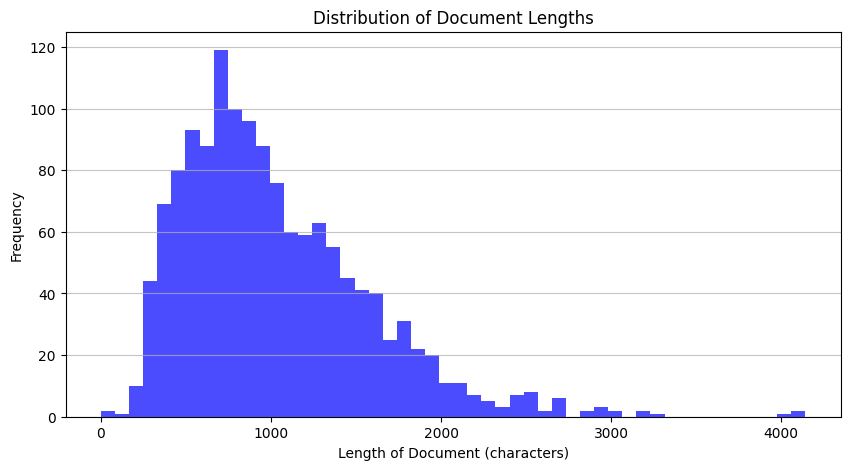

In [9]:
# Plot lengths of contents
import matplotlib.pyplot as plt
def plot_lengths(lengths):
    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of Document Lengths')
    plt.xlabel('Length of Document (characters)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

plot_lengths(lengths)

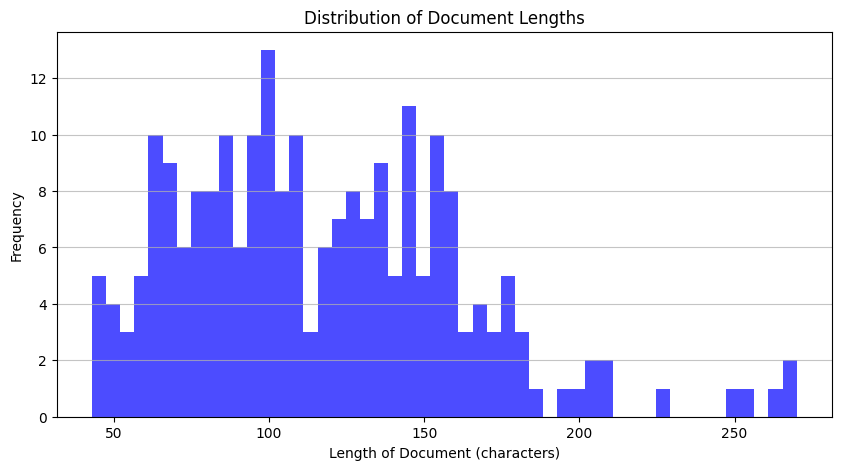

In [11]:
# In TEST folder, have a query.txt file, in this file store 255 lines of queries. Calculate their lengths and store in a list.
def get_query_lengths(file_path):
    lengths = []
    with open(file_path, 'r') as file:
        for line in file:
            lengths.append(len(line.strip()))
    return lengths

query_lengths = get_query_lengths('c:\\Users\\Lenovo\\learning\\sematic_search\\data\\Cranfield\\TEST\\query.txt')
# Plot lengths of queries
plot_lengths(query_lengths)

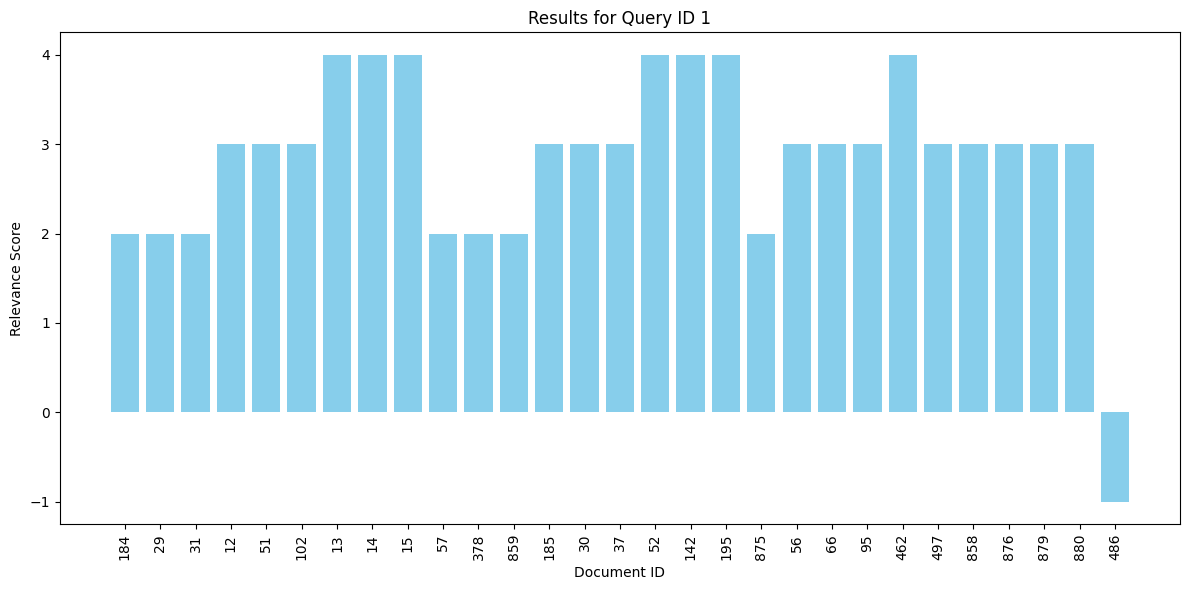

In [31]:
# In RES folder have 255 txt files, that is results of queries. Each result is have docid that relevance and its relevance score. Input is query id, output is a plot that intuitively show the main information.
def plot_query_results(directory, query_id):
    import matplotlib.pyplot as plt
    import numpy as np

    file_path = os.path.join(directory, f'{query_id}.txt')
    if not os.path.exists(file_path):
        print(f"No results found for query ID {query_id}")
        return
    doc_ids = []
    scores = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            
            doc_id, score = parts[1], parts[2]
            doc_ids.append(doc_id)
            scores.append(float(score))

    if not doc_ids:
        print(f"No relevant documents found for query ID {query_id}")
        return
    
    indices = np.arange(len(doc_ids))
    plt.figure(figsize=(12, 6))
    plt.bar(indices, scores, color='skyblue')
    plt.xticks(indices, doc_ids, rotation=90)
    plt.title(f'Results for Query ID {query_id}')
    plt.xlabel('Document ID')
    plt.ylabel('Relevance Score')
    plt.tight_layout()
    plt.show()

# Example usage for plotting results of a specific query
plot_query_results('C:\\Users\\Lenovo\\learning\\sematic_search\\data\\Cranfield\\TEST\\RES', 1)
